# Exploratory Data Analysis

In this .ipynb, we will analyze the data that we have currently and analyze it to understand our data better and create a model suited for the usage.

---

## Importing Modules

In [2]:
import pandas as pd  # Manipulasi dan analisis data tabular
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [3]:
data = pd.read_csv("dataset\P2_FinPro_Final_Record.csv")

In [3]:
data.head(10)

,id,gender,car,realty,child_number,income,occupation,education,marital_status,house_type,...,work_phone,phone,email,family_size,status,start_date,snapshot_month,months_balance,credit_status,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,X,2021-09-01,2021-09-01,0,NPL,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,0,2021-09-01,2021-10-01,-1,NPL,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,1,2021-09-01,2021-11-01,-2,NPL,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2021-12-01,-3,NPL,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-01-01,-4,NPL,1
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-02-01,-5,NPL,1
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-03-01,-6,NPL,1
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-04-01,-7,NPL,1
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-05-01,-8,NPL,1
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,2.0,C,2021-09-01,2022-06-01,-9,NPL,1


In [4]:
data.describe()

,id,child_number,income,days_birth,days_employed,mobile_phone,work_phone,phone,email,family_size,months_balance,target
count,7.775470e+05,777547.000000,7.775470e+05,777547.000000,777547.000000,777547.0,777547.000000,777547.000000,777547.000000,777547.000000,777547.000000,777547.000000
mean,5.078753e+06,0.428172,1.885509e+05,-16124.221404,57764.129957,1.0,0.231838,0.301027,0.091695,2.208947,-15.377747,0.140701
std,4.180254e+04,0.745809,1.016255e+05,4104.141492,136461.382677,0.0,0.422006,0.458705,0.288595,0.907422,12.636282,0.347714
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.044633e+06,0.000000,1.215000e+05,-19452.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000,-23.000000,0.000000
50%,5.069532e+06,0.000000,1.620000e+05,-15759.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000,-12.000000,0.000000
75%,5.115552e+06,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000,-5.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [5]:
print(data.columns)

Index(['id', 'gender', 'car', 'realty', 'child_number', 'income', 'occupation',
       'education', 'marital_status', 'house_type', 'days_birth',
       'days_employed', 'mobile_phone', 'work_phone', 'phone', 'email',
       'family_size', 'status', 'start_date', 'snapshot_month',
       'months_balance', 'credit_status', 'target'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777547 entries, 0 to 777546
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              777547 non-null  int64  
 1   gender          777547 non-null  object 
 2   car             777547 non-null  object 
 3   realty          777547 non-null  object 
 4   child_number    777547 non-null  int64  
 5   income          777547 non-null  float64
 6   occupation      777547 non-null  object 
 7   education       777547 non-null  object 
 8   marital_status  777547 non-null  object 
 9   house_type      777547 non-null  object 
 10  days_birth      777547 non-null  int64  
 11  days_employed   777547 non-null  int64  
 12  mobile_phone    777547 non-null  int64  
 13  work_phone      777547 non-null  int64  
 14  phone           777547 non-null  int64  
 15  email           777547 non-null  int64  
 16  family_size     777547 non-null  float64
 17  status    

___

## EDA 1 Creditworthiness & Risk Profile

### 1.1 Approved vs Declined Credit Applications

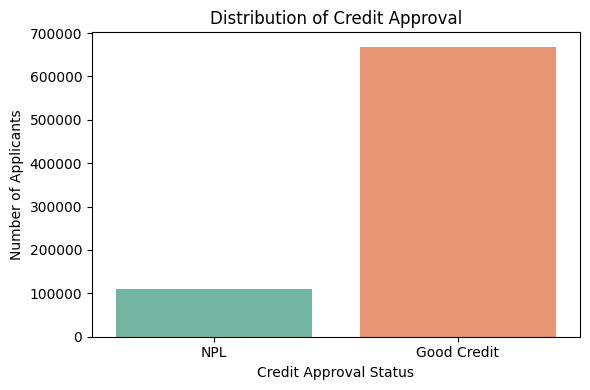

In [7]:
Credit_Approval = data["credit_status"].value_counts()

plt.figure(figsize = (6,4))
sns.countplot(x = "credit_status", data = data, palette = "Set2")
plt.title("Distribution of Credit Approval")
plt.xlabel("Credit Approval Status")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()

### 1.2. Approval by Age

In [8]:
data["age"] = (-data["days_birth"]) // 365

display(data["age"])

0         32
1         32
2         32
3         32
4         32
          ..
777542    25
777543    25
777544    25
777545    25
777546    25
Name: age, Length: 777547, dtype: int64

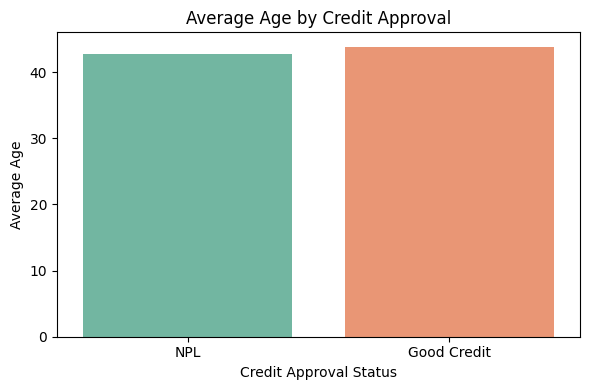

In [9]:
plt.figure(figsize=(6, 4))
sns.barplot(x='credit_status', y='age', data=data, estimator='mean', ci=None, palette='Set2')

plt.title('Average Age by Credit Approval')
plt.xlabel('Credit Approval Status')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

### 1.3. Years Employed vs Credit Approval Status

In [5]:
data['years_employed'] = data['days_employed'].apply(lambda x: 0 if x == 365243 else -x // 365)

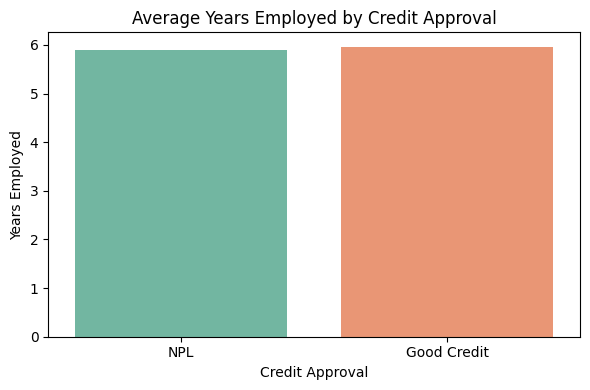

In [6]:
plt.figure(figsize=(6, 4))
sns.barplot(x='credit_status', y='years_employed', data=data, estimator='mean', ci=None, palette='Set2')
plt.title('Average Years Employed by Credit Approval')
plt.xlabel('Credit Approval')
plt.ylabel('Years Employed')
plt.tight_layout()
plt.show()

### 1.4. Car Ownership / House Ownership vs Credit Approval

In [12]:
print(data['car'].value_counts())
print(data['realty'].value_counts())

car
N    473239
Y    304308
Name: count, dtype: int64
realty
Y    512832
N    264715
Name: count, dtype: int64


In [13]:
car_approval = data.groupby('car')['credit_status'].value_counts(normalize=True).unstack()
print("Approval rates by car ownership:\n", car_approval)

Approval rates by car ownership:
 credit_status  Good Credit       NPL
car                                 
N                 0.856111  0.143889
Y                 0.864256  0.135744


In [14]:
realty_approval = data.groupby('realty')['credit_status'].value_counts(normalize=True).unstack()
print("Approval rates by realty ownership:\n", realty_approval)

Approval rates by realty ownership:
 credit_status  Good Credit       NPL
realty                              
N                 0.844342  0.155658
Y                 0.867019  0.132981


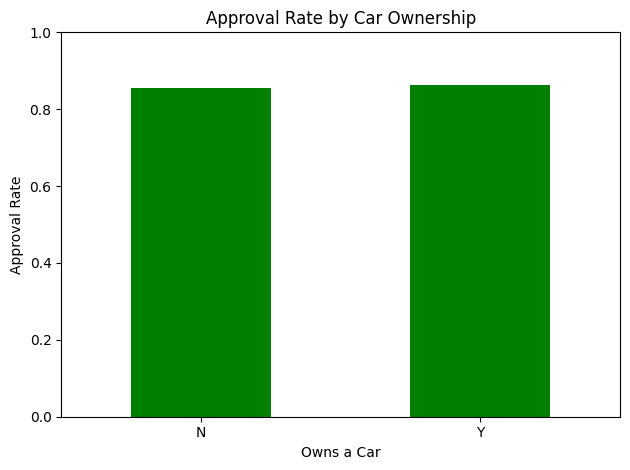

In [15]:
car_approval["Good Credit"].plot(kind='bar', color='green')
plt.title('Approval Rate by Car Ownership')
plt.xlabel('Owns a Car')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

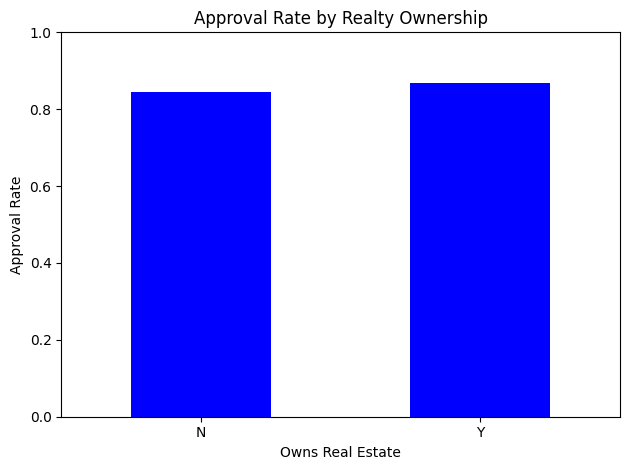

In [16]:
realty_approval["Good Credit"].plot(kind='bar', color='blue')
plt.title('Approval Rate by Realty Ownership')
plt.xlabel('Owns Real Estate')
plt.ylabel('Approval Rate')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### 1.5. Occupation vs Credit Acceptance

In [17]:
print(data['target'].unique())
print(data['occupation'].unique())

[1 0]
['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']


In [18]:
default_rates = data.groupby('occupation')['target'].mean().sort_values()
print(default_rates)

occupation
Student                 0.044510
Pensioner               0.127232
Working                 0.140327
State servant           0.145824
Commercial associate    0.149296
Name: target, dtype: float64


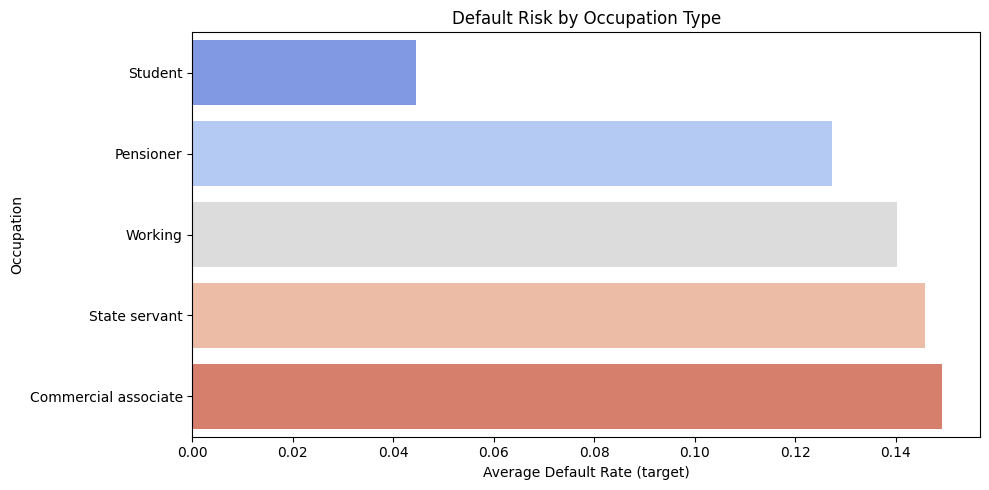

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=default_rates.values, y=default_rates.index, palette='coolwarm')
plt.title('Default Risk by Occupation Type')
plt.xlabel('Average Default Rate (target)')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

In [20]:
occupation_counts = data['occupation'].value_counts()
summary = data.groupby('occupation')['target'].agg(['mean', 'count']).sort_values(by='mean')
print(summary)

                          mean   count
occupation                            
Student               0.044510     337
Pensioner             0.127232  128340
Working               0.140327  400101
State servant         0.145824   65435
Commercial associate  0.149296  183334


___

## EDA 2 Demographic & Household Analysis

### 2.1. Which gender dominates the applicant pool, and does that affect approval rates?

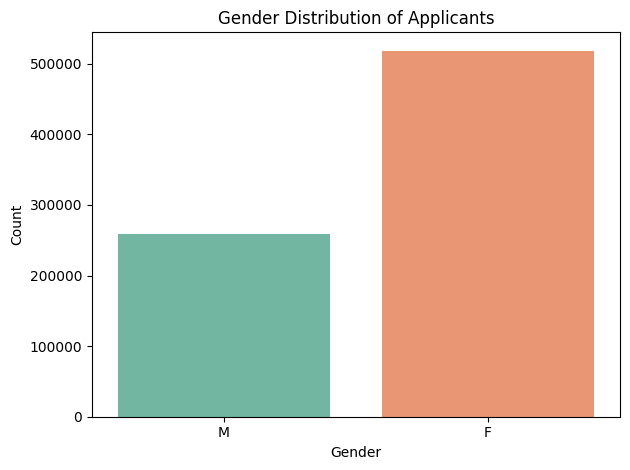

gender
F    0.667106
M    0.332894
Name: proportion, dtype: float64


In [21]:
# Countplot
sns.countplot(x='gender', data=data, palette='Set2')
plt.title('Gender Distribution of Applicants')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Print proportions
print(data['gender'].value_counts(normalize=True))

In [22]:
approval_by_gender = data.groupby('gender')['credit_status'].value_counts(normalize=True).unstack()
print("Approval rates by gender:\n", approval_by_gender)

Approval rates by gender:
 credit_status  Good Credit       NPL
gender                              
F                 0.864752  0.135248
M                 0.848370  0.151630


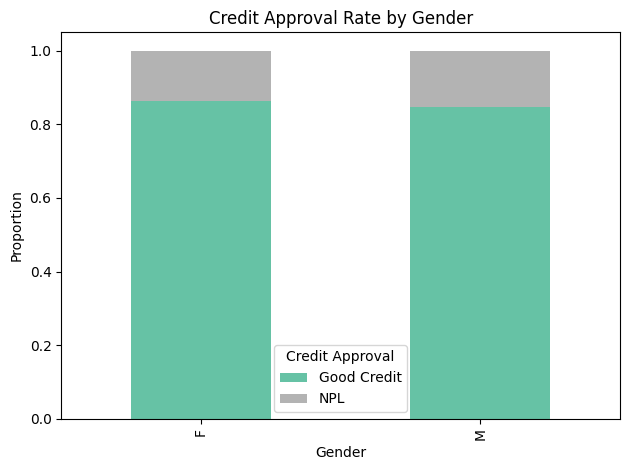

In [23]:
approval_by_gender[["Good Credit", "NPL"]].plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Credit Approval Rate by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Credit Approval')
plt.tight_layout()
plt.show()

### 2.2. Do marital status or family size impact credit approval or target outcomes?

#### 2.2.1. Martial Status

In [24]:
approval_by_marital = data.groupby('marital_status')['credit_status'].value_counts(normalize=True).unstack()
print(approval_by_marital)

credit_status         Good Credit       NPL
marital_status                             
Civil marriage           0.851276  0.148724
Married                  0.862997  0.137003
Separated                0.871506  0.128494
Single / not married     0.840871  0.159129
Widow                    0.848015  0.151985


In [25]:
default_by_marital = data.groupby('marital_status')['target'].mean().sort_values()
print(default_by_marital)

marital_status
Separated               0.128494
Married                 0.137003
Civil marriage          0.148724
Widow                   0.151985
Single / not married    0.159129
Name: target, dtype: float64


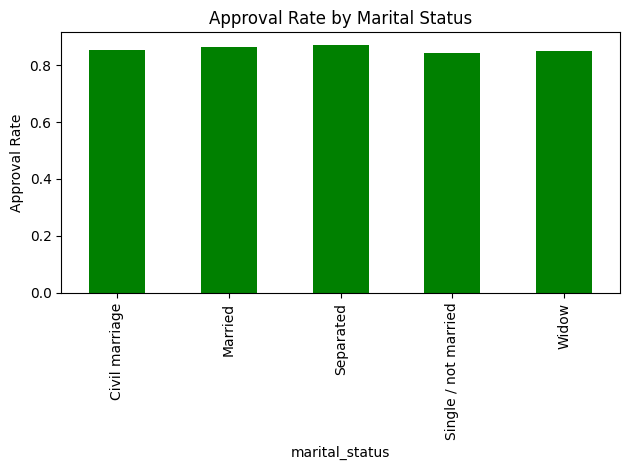

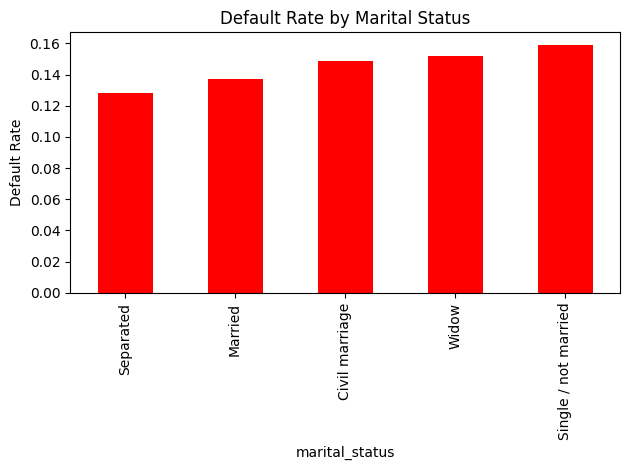

In [26]:
# Approval Rate
approval_by_marital['Good Credit'].plot(kind='bar', color='green', title='Approval Rate by Marital Status')
plt.ylabel('Approval Rate')
plt.tight_layout()
plt.show()

# Default Risk
default_by_marital.plot(kind='bar', color='red', title='Default Rate by Marital Status')
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

#### 2.2.2. Family Size

In [27]:
data['family_size_group'] = pd.cut(data['family_size'], bins=[0,1,2,3,5,10], labels=['1','2','3','4-5','6+'])

In [28]:
# Credit approval rate by family size
approval_by_family = data.groupby('family_size_group')['credit_status'].value_counts(normalize=True).unstack()
# Default risk by family size
default_by_family = data.groupby('family_size_group')['target'].mean()

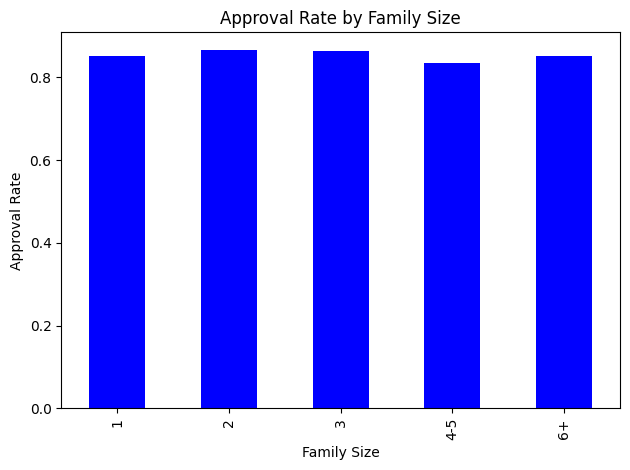

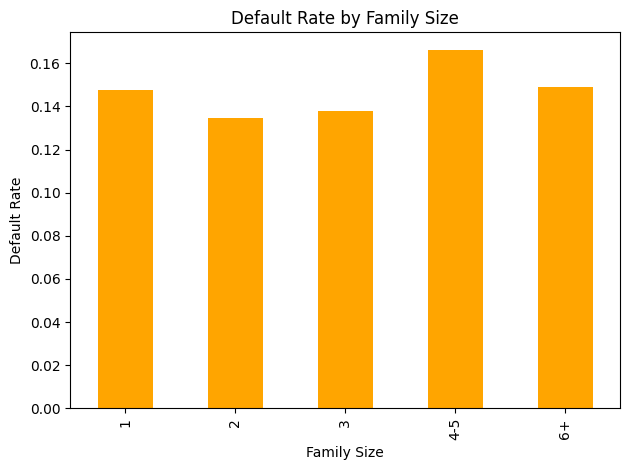

In [29]:
# Approval rate plot
approval_by_family['Good Credit'].plot(kind='bar', color='blue', title='Approval Rate by Family Size')
plt.ylabel('Approval Rate')
plt.xlabel('Family Size')
plt.tight_layout()
plt.show()

# Default rate plot
default_by_family.plot(kind='bar', color='orange', title='Default Rate by Family Size')
plt.ylabel('Default Rate')
plt.xlabel('Family Size')
plt.tight_layout()
plt.show()

### 2.3. Are customers with children more likely to default or be denied?

In [30]:
data['has_children'] = data['child_number'] > 0

In [31]:
approval_by_children = data.groupby('has_children')['credit_status'].value_counts(normalize=True).unstack()
print(approval_by_children)

credit_status  Good Credit       NPL
has_children                        
False             0.862509  0.137491
True              0.851979  0.148021


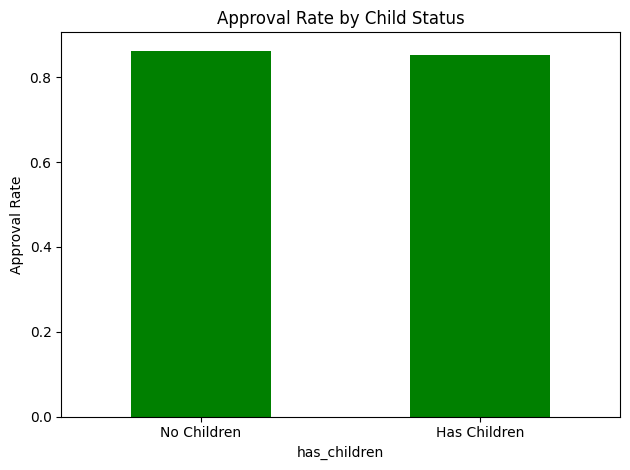

In [32]:
approval_by_children['Good Credit'].plot(kind='bar', color='green', title='Approval Rate by Child Status')
plt.xticks([0, 1], ['No Children', 'Has Children'], rotation=0)
plt.ylabel('Approval Rate')
plt.tight_layout()
plt.show()

In [33]:
default_by_children = data.groupby('has_children')['target'].mean()
print(default_by_children)

has_children
False    0.137491
True     0.148021
Name: target, dtype: float64


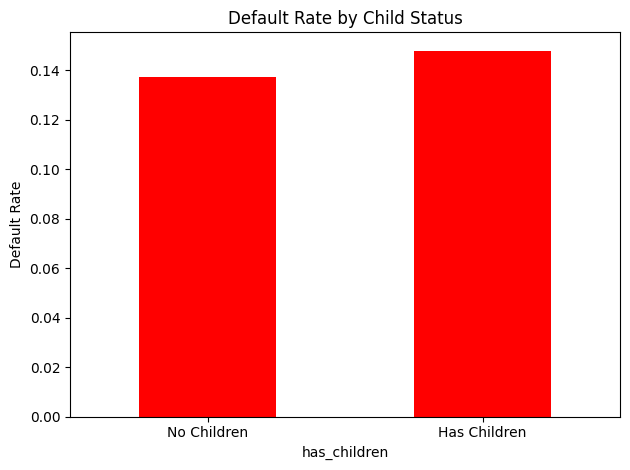

In [34]:
default_by_children.plot(kind='bar', color='red', title='Default Rate by Child Status')
plt.xticks([0, 1], ['No Children', 'Has Children'], rotation=0)
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

### 2.4. What is the average age of applicants? How does age correlate with approval?

In [35]:
average_age = data['age'].mean()
print(f"Average age of applicants: {average_age:.1f} years")

Average age of applicants: 43.7 years


In [36]:
# Convert approval to numeric
data['approval_numeric'] = data['credit_status'].map({'Good Credit': 1, 'NPL': 0})
correlation = data[['age', 'approval_numeric']].corr().loc['age', 'approval_numeric']
print(f"Correlation between age and approval: {correlation:.3f}")

Correlation between age and approval: 0.033


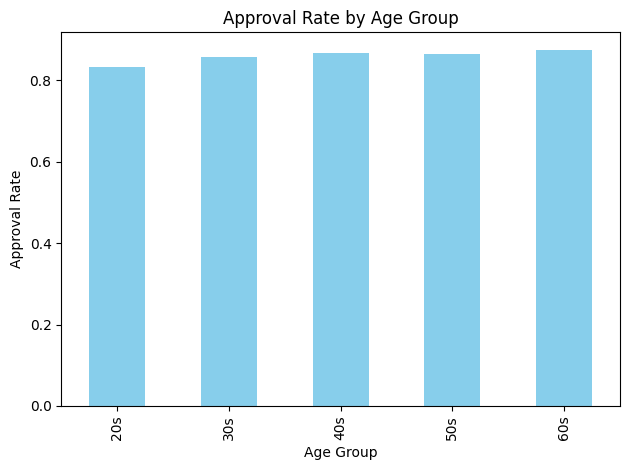

In [37]:
data['age_group'] = pd.cut(data['age'], bins=[20,30,40,50,60,70], labels=['20s','30s','40s','50s','60s'])

approval_by_age = data.groupby('age_group')['approval_numeric'].mean()

approval_by_age.plot(kind='bar', color='skyblue', title='Approval Rate by Age Group')
plt.ylabel('Approval Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

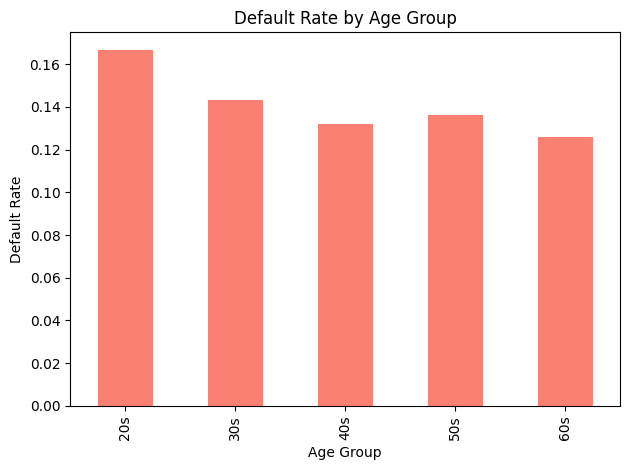

In [38]:
data.groupby('age_group')['target'].mean().plot(kind='bar', color='salmon', title='Default Rate by Age Group')
plt.ylabel('Default Rate')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

### 2.5. Do single vs. married applicants show different patterns of repayment?

In [39]:
data['marital_status'].value_counts()

marital_status
Married                 546505
Single / not married     94332
Civil marriage           60340
Separated                45255
Widow                    31115
Name: count, dtype: int64

In [40]:
data['marital_group'] = data['marital_status'].replace({
    'Single / not married': 'Single',
    'Civil marriage': 'Married',
    'Separated': 'Other',
    'Widow': 'Other',
    'Widowed': 'Other'
})

In [41]:
default_by_marital = data.groupby('marital_group')['target'].mean().sort_values()
print(default_by_marital)

marital_group
Other      0.138065
Married    0.138169
Single     0.159129
Name: target, dtype: float64


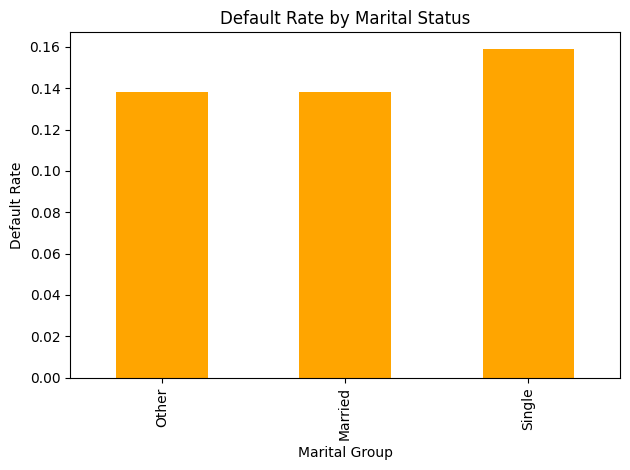

In [42]:
default_by_marital.plot(kind='bar', color='orange')
plt.title('Default Rate by Marital Status')
plt.ylabel('Default Rate')
plt.xlabel('Marital Group')
plt.tight_layout()
plt.show()

In [43]:
summary = data.groupby('marital_group')['target'].agg(['mean', 'count']).sort_values(by='mean')
print(summary)

                   mean   count
marital_group                  
Other          0.138065   76370
Married        0.138169  606845
Single         0.159129   94332


___

## EDA 3 Housing & Lifestyle Patterns

### 3.1. What house types are most common among applicants, and how do they relate to approval?

In [44]:
house_counts = data['house_type'].value_counts()
print(house_counts)

house_type
House / apartment      696983
With parents            35735
Municipal apartment     24640
Rented apartment        10898
Office apartment         5636
Co-op apartment          3655
Name: count, dtype: int64


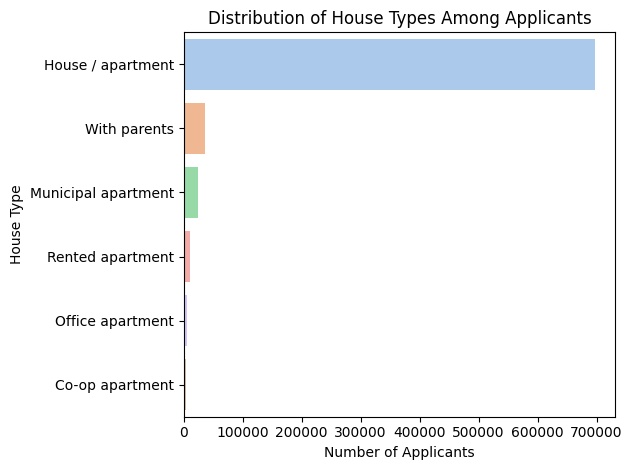

In [45]:
sns.countplot(data=data, y='house_type', order=house_counts.index, palette='pastel')
plt.title('Distribution of House Types Among Applicants')
plt.xlabel('Number of Applicants')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

In [46]:
approval_by_house = data.groupby('house_type')['credit_status'].value_counts(normalize=True).unstack()
print(approval_by_house)

credit_status        Good Credit       NPL
house_type                                
Co-op apartment         0.867305  0.132695
House / apartment       0.860875  0.139125
Municipal apartment     0.843304  0.156696
Office apartment        0.823279  0.176721
Rented apartment        0.829969  0.170031
With parents            0.853393  0.146607


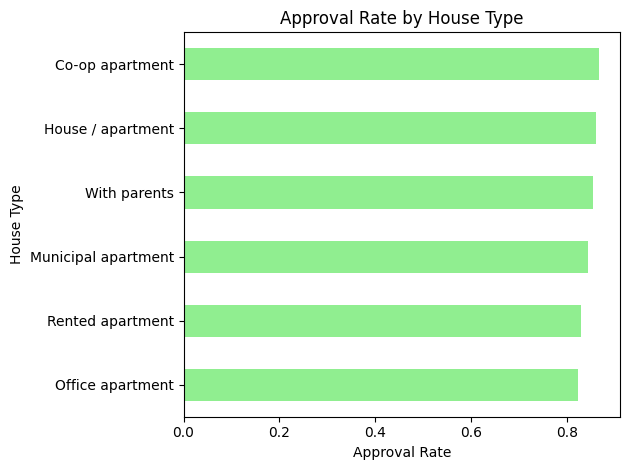

In [47]:
# Approval rate only
approval_by_house['Good Credit'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('Approval Rate by House Type')
plt.xlabel('Approval Rate')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

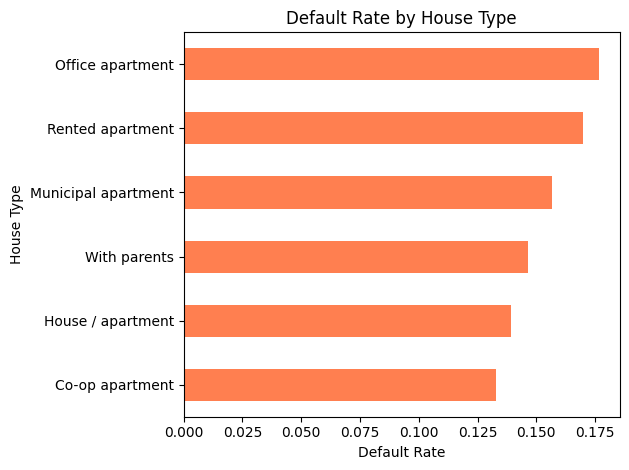

In [48]:
default_by_house = data.groupby('house_type')['target'].mean().sort_values()
default_by_house.plot(kind='barh', color='coral')
plt.title('Default Rate by House Type')
plt.xlabel('Default Rate')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

### 3.2. Are real estate owners less risky as borrowers?

In [49]:
default_by_realty = data.groupby('realty')['target'].mean()
print(default_by_realty)

realty
N    0.155658
Y    0.132981
Name: target, dtype: float64


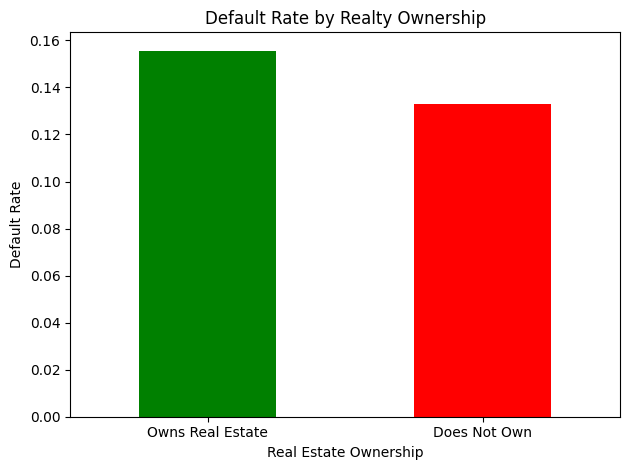

In [50]:
default_by_realty.plot(kind='bar', color=['green', 'red'], title='Default Rate by Realty Ownership')
plt.xticks([0, 1], ['Owns Real Estate', 'Does Not Own'], rotation=0)
plt.ylabel('Default Rate')
plt.xlabel('Real Estate Ownership')
plt.tight_layout()
plt.show()

In [51]:
approval_by_realty = data.groupby('realty')['credit_status'].value_counts(normalize=True).unstack()
print(approval_by_realty)

credit_status  Good Credit       NPL
realty                              
N                 0.844342  0.155658
Y                 0.867019  0.132981


___

## EDA 4. Employment & Occupation

### 4.1 Are Applicants From Certain Occupations More Likely To Default?

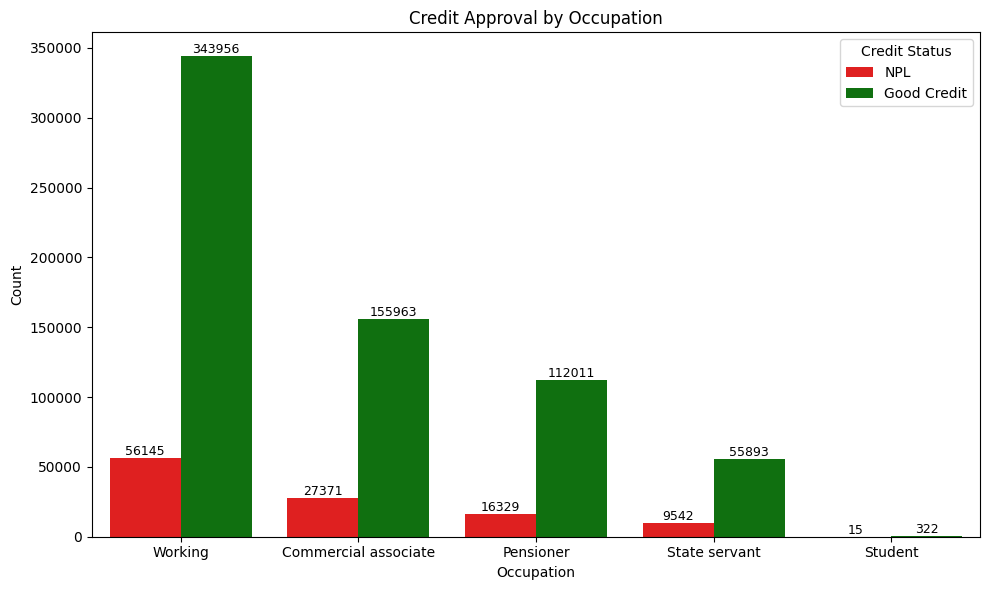

In [13]:
# Count each combination of occupation and credit_status
group_counts = data.groupby(['occupation', 'credit_status']).size().unstack(fill_value=0)

# Define colors: green for higher count, red for lower
colors = []
for occ in group_counts.index:
    values = group_counts.loc[occ]
    if values.iloc[0] > values.iloc[1]:
        colors.append(['red', 'green'])

# Flatten the color list
flat_colors = [color for pair in colors for color in pair]

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='occupation', hue='credit_status', palette=flat_colors)
plt.title('Credit Approval by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Credit Status')
plt.tight_layout()

# Annotate each bar with its count
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9,
            color='black'
        )

plt.show()

Seseorang yang bekerja atau "working", memiliki jumlah pengajuan terbanyak, dimana dengan total 400.000 pengajuan, diikuti oleh "commercial associate", "pensioner", "state servant", dan "student". Pekerja profesional menjadi kelompok terbesar baik dalam pengajuan maupun dalam persetujuan kredit, yang menunjukkan bahwa seseorang yang bekerja memberikan kepercayaan yang tinggi. Untuk rekan komersial dan pensiunan juga memiliki banyak persetujuan, ini dapat terjadi karena mereka memiliki penghasilan yang stabil serta riwayat keuangan yang konsisten. Lalu untuk pegawai negeri dan pelajar memiliki jumlah persetujuan yang lebih rendah dibandingkan yang lain, ini dapat terjadi karena riwayat finansial yang terbatas karena umur atau karena kriteria evaluasi yang ketat terhadap seorang pelajar yang belum memiliki penghasilan contohnya.

Someone who is “working” has the highest number of credit applications, totaling 400,000 submissions, followed by “commercial associate,” “pensioner,” “state servant,” and “student.” Professional workers make up the largest group both in terms of applications and approvals, indicating that being employed significantly boosts creditworthiness. Commercial associates and pensioners also show high approval rates, likely due to their stable income and consistent financial history. Meanwhile, state servants and students have lower approval rates, which may be attributed to limited financial records due to age or stricter evaluation criteria—especially for students who often lack a steady income.

### 4.2 Is There a Relationship Between 'years_employed' and 'income'?

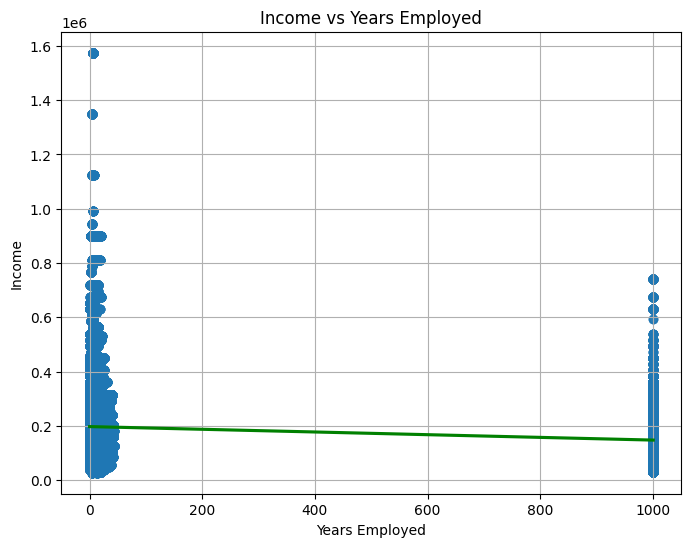

In [4]:
# Convert days_employed to years as a standalone object
# years_employed = data['days_employed'].abs() / 365

plt.figure(figsize=(8, 6))
sns.regplot(data=data, x=abs(data['days_employed'] / 365), 
            y='income',
            scatter_kws={'alpha':0.5}, 
            line_kws={'color':'green'})
plt.title('Income vs Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.grid(True)

Dari scatter plot ini, dapat kita ketahui bahwa terdapat outlier data, yaitu pada tahun seseorang bekerja yang sebesar 1000 tahun. Setelah ditelusuri, ternyata ini merupakan data yang salah diinput, yang dimiliki oleh pensiunan, dan berdasarkan pertimbangan kami, data outlier tahun bekerja ini akan dicapping ke 0 tahun. Lalu dapat dilihat juga bahwa tidak ada hubungan antara tahun lama bekerja seseorang dengan jumlah pendapatan yang dihasilkan.

From this scatter plot, we can identify a data outlier—a record showing someone had worked for 1000 years. Upon investigation, this was an input error linked to a pensioner, and based on our assessment, the outlier will be capped at 0 years of employment. Additionally, the plot shows no clear relationship between the length of employment and the amount of income earned.

___

## EDA 5. Contactability & Data Completeness

### 5.1 How Many Customers Provide a Mobile Phone, Work Phone, or Email?

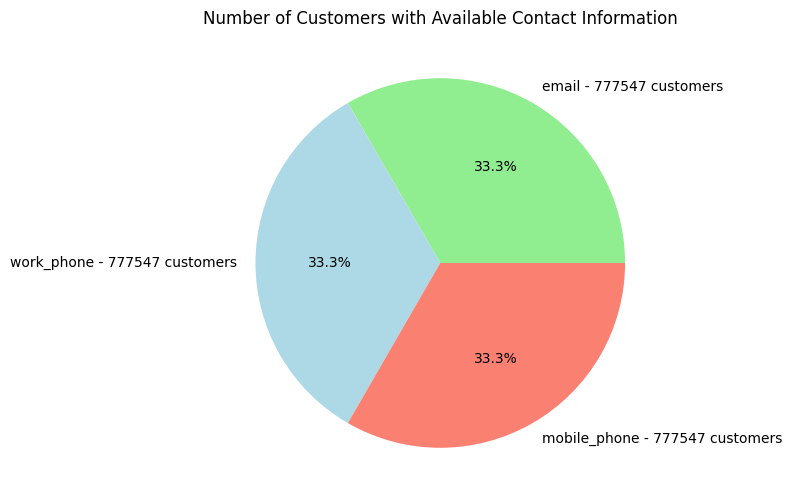

In [56]:
contact_cols = ['email', 'work_phone', 'mobile_phone']
data[contact_cols] = data[contact_cols].notnull().astype(int)  # assume null = not available
contact_counts = data[contact_cols].sum()

# Create full labels with counts
labels = [f"{idx} - {int(val)} customers" for idx, val in contact_counts.items()]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(contact_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title('Number of Customers with Available Contact Information')
plt.show()

Insight:

Semua orang yang ingin mengajukan kredit, mengisi informasi tentang email, mobile_phone dan work_phone masing-masing.

Everyone who wants to apply for credit fills out their personal information, including email, mobile phone, and work phone.

___

## EDA 6. Financial Behavior & Transaction History

### 6.1 What is the distribution of months_balance (if it refers to account history)?

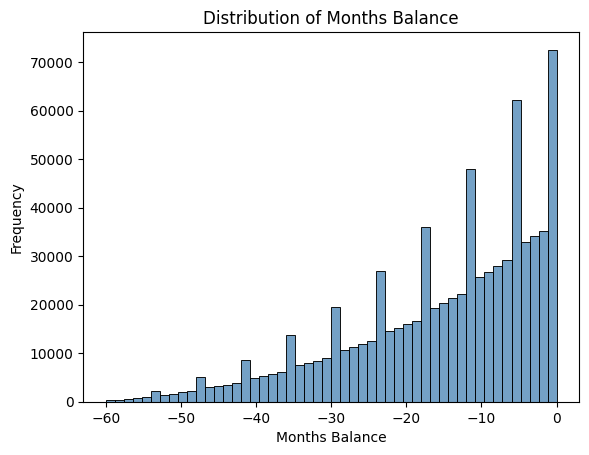

In [57]:
sns.histplot(data=data, x='months_balance', bins=50, color='steelblue')
plt.title('Distribution of Months Balance')
plt.xlabel('Months Balance')
plt.ylabel('Frequency')
plt.show()

Insight:

Transaksi paling sedikit ada pada transaksi terlama, yaitu dilakukan sejak 5 tahun yang lalu, dan terus bertambah sampai menuju ke bulan saat ini (0). 

The fewest transactions occurred in the earliest period, around five years ago, and have steadily increased up to the present month (0).

### 6.2 Does months_balance have an impact for credit_status

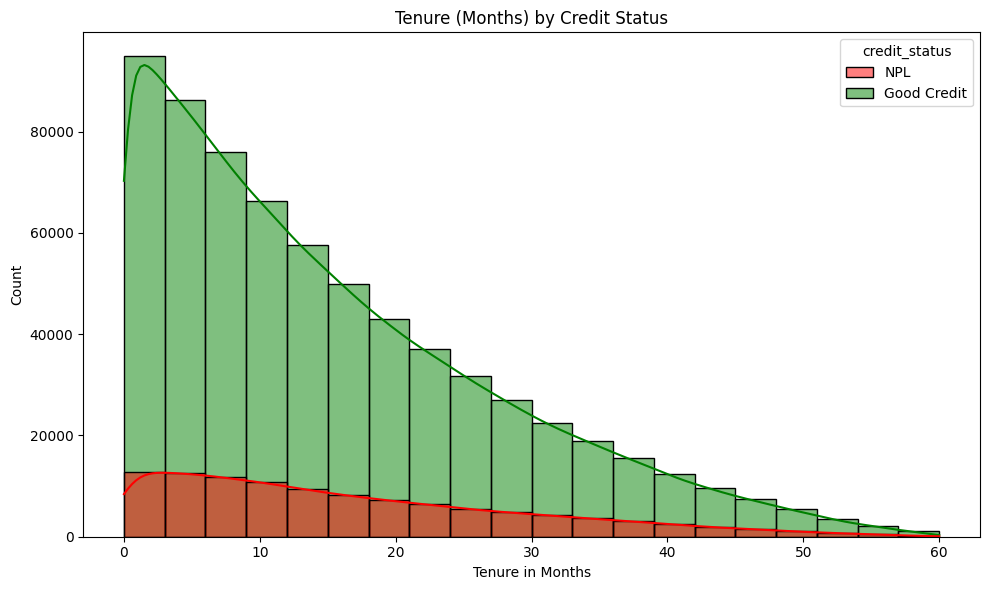

In [9]:
# Define custom colors for each category in credit_status
palette_colors = {
    'Good Credit': 'green',
    'NPL': 'red'
}

plt.figure(figsize=(10, 6))
sns.histplot(
    data=data,
    x=-data['months_balance'],  # Negative sign to flip the x-axis if needed
    hue='credit_status',
    bins=20,
    kde=True,
    palette=palette_colors
)
plt.title("Tenure (Months) by Credit Status")
plt.xlabel("Tenure in Months")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Dari sini dapat kita lihat bahwa proporsi antara status NPL dengan Good Credit lebih bagus jika riwayat tenor yang dilakukan kecil. Semakin tinggi tenor, proporsi NPLnya akan mengikuti Good Credit.

From this, we can observe that the proportion between NPL status and Good Credit tends to be more favorable when the credit tenure history is short. As the tenure increases, the proportion of NPL cases gradually follows the trend of Good Credit, indicating a potential risk alignment over time.

___

## EDA 7. Anomalies & Outliers

### 7.1. Are there any suspiciously high child_number, income, or family_size values?

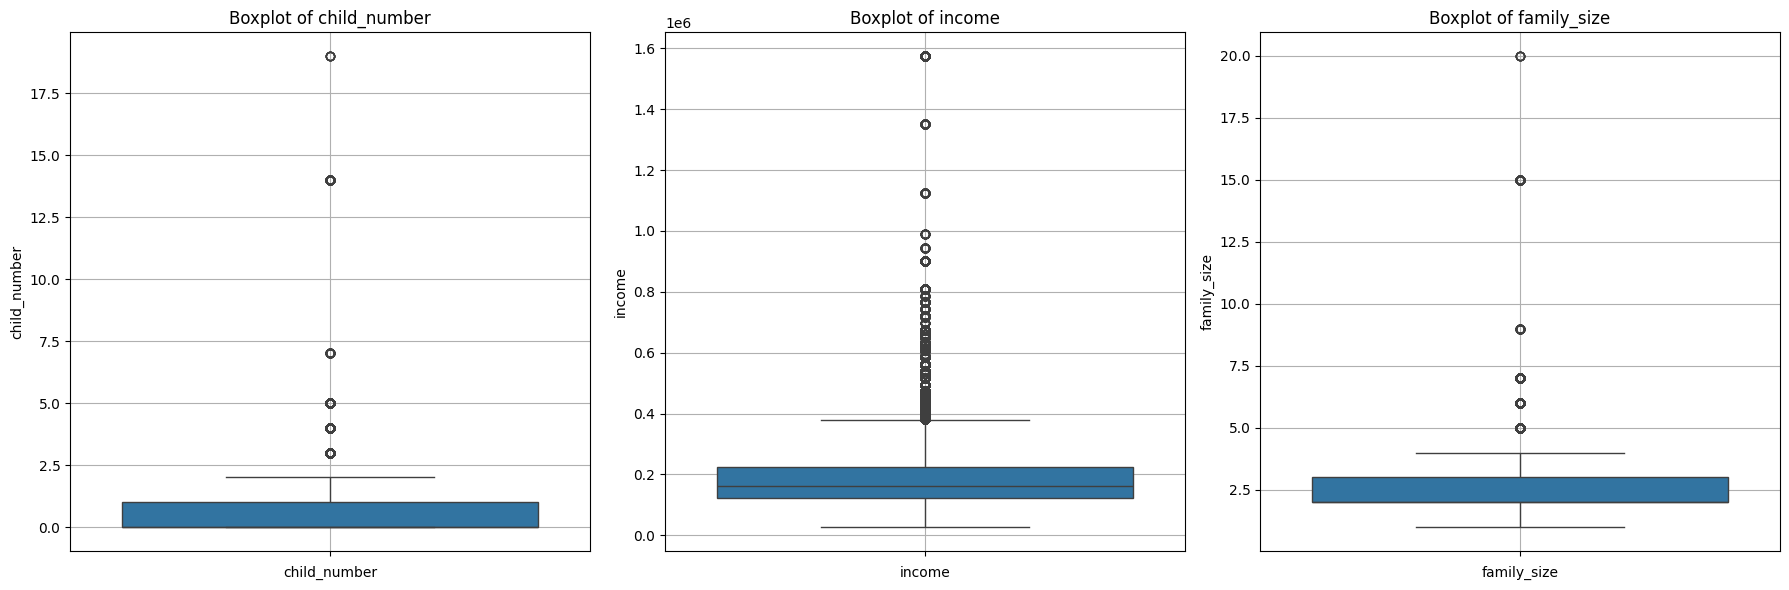

In [ ]:
features = ['child_number', 'income', 'family_size']

# Make the plot side by side
fig, axes = plt.subplots(1, len(features), figsize=(18, 6))

for i, feature in enumerate(features):
    sns.boxplot(y=data[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Insight:

Mayoritas untuk child number adalah tidak memiliki anak dan memiliki 1 orang anak, akan tetapi terdapat outlier yaitu memiliki 13 bahkan 18 anak.

Untuk jumlah income, rata-rata pengajuan memiliki penghasilan sebesar 100.000 hingga 250.000 euro, dan memiliki outlier hingga 1.600.000 euro. 

Untuk family_size, ukuran family_size bermayoritas pada 2 hingga 3 anggota. Dari kolom ini juga terdapat outlier yaitu terdapat family_size berukuran 20 yang terdorong dari jumlah anak sebesar 18.

Untuk ketiga kolom ini tidak dilakukan feature engineering, karena income seseorang yang akan menggambarkan penghasilannya mereka sendiri, sedangkan karena jumlah outlier dari child_number dan family_size tidak signifikan jumlahnya, maka tidak akan dicapping atau diremove.

The majority of applicants fall under child number categories of having no children or just one, although there are outliers showing as many as 13 or even 18 children. Regarding income, most submissions report earnings between €100,000 and €250,000, with outliers reaching up to €1,600,000. As for family size, the typical household consists of 2 to 3 members. This column also contains outliers—such as a family size of 20—driven by the presence of up to 18 children.

Feature engineering was not applied to any of these three columns. Income is left as-is since it reflects each individual's earning power, while the outliers in child_number and family_size are not capped or removed due to their minimal proportion in the dataset.


### 7.2. Do extreme income values skew the distribution? Should they be capped or log-transformed?

In [21]:
income_skew = skew(data['income'].dropna())
print(f"Skewness of income: {income_skew:.4f}")

Skewness of income: 2.5776


Dalam analisis statistik, nilai skewness yang masih dapat ditoleransi untuk distribusi mendekati normal adalah antara -2 hingga +2, sebagaimana disarankan oleh Hair et al. (2010) dan George & Mallery (2010), dan karena jumlah skewness dari income adalah 2.58, maka kolom dari income sangat skew ke arah kanan. Ini dapat terjadi karena banyaknya outlier income yang sangat besar perbedaannya dengan mean dari income itu sendiri, akan tetapi untuk kolom ini tidak dilakukan capping atau handling outlier karena value dalam kolom inilah yang merepresentasikan pendapatan seseorang.

In statistical analysis, a skewness value between -2 and +2 is generally acceptable for distributions approaching normality, as suggested by Hair et al. (2010) and George & Mallery (2010). Since the skewness of the income column is 2.58, it indicates a strong right skew, likely caused by extreme outlier values significantly higher than the mean, however, no capping or outlier handling is applied, as the values in this column directly represent an individual's actual income.

___

## EDA 8. Relationships Between Variables

### 8.1 Which variables are most strongly correlated with the target or credit approval?

In [25]:
# Step 1: Map target variable
target = data['credit_status'].map({'Good Credit': 0, 'NPL': 1})

# Step 2: Select numeric columns and drop metadata-like columns
excluded_cols = ['mobile_phone', 'work_phone', 'email']
numeric_cols = data.select_dtypes(include='number').drop(columns=excluded_cols, errors='ignore').columns

# Step 3: Calculate Spearman correlations
spearman_results = []

for col in numeric_cols:
    # Skip target itself
    if col == 'credit_status' or col == 'target':
        continue
    corr, pval = spearmanr(data[col], target, nan_policy='omit')
    spearman_results.append((col, corr, pval))

# Step 4: Create DataFrame of results and round p-values
spearman_df = pd.DataFrame(spearman_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
spearman_df['p-value'] = spearman_df['p-value'].round(3)
spearman_df = spearman_df.sort_values(by='Spearman Correlation', ascending=False)

# Step 5: Show results
print(spearman_df)


          Feature  Spearman Correlation  p-value
3      days_birth              0.032930    0.000
1    child_number              0.017006    0.000
2          income              0.015795    0.000
0              id              0.012483    0.000
6     family_size              0.006478    0.000
4   days_employed             -0.000509    0.654
5           phone             -0.008563    0.000
7  months_balance             -0.040179    0.000


Insight:

Kolom numerik yang tidak berkorelasi dengan credit_status hanya ada 1, yaitu kolom days_employed atau lama seseorang bekerja, dan semua kolom numerik selain days_employed memiliki korelasi terhadap credit_status, akan tetapi korelasinya tidak kuat yang bahkan tidak sampai di angka 0.1. Hal ini dapat dilihat dalam tabel angka p-value dan spearman correlation diatas.

Among the numerical columns, only one—days_employed, which reflects how long someone has been employed—shows no correlation with credit_status. All other numerical columns do exhibit some correlation with credit_status, although the strength of those correlations remains weak, not even reaching a value of 0.1. This is evident from the p-value and Spearman correlation table shown above.


In [ ]:
# Define Cramér's V calculation function
def cramers_v(col1, col2):
    contingency = pd.crosstab(col1, col2)
    if contingency.empty or contingency.shape[0] < 2 or contingency.shape[1] < 2:
        return np.nan  # skip if not enough variation
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.to_numpy().sum()
    r, k = contingency.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Step 1: Select categorical columns (excluding target)
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('credit_status', errors='ignore')

# Step 2: Calculate Cramér's V
cramers_results = []

for col in categorical_cols:
    score = cramers_v(data[col], data['credit_status'])
    if not np.isnan(score):  # only include valid results
        cramers_results.append((col, round(score, 3)))

# Step 3: Compile results into a DataFrame
cramers_df = pd.DataFrame(cramers_results, columns=['Feature', "Cramér's V"])
cramers_df = cramers_df.sort_values(by="Cramér's V", ascending=False).reset_index(drop=True)

# Step 4: Display results
print(cramers_df)

           Feature  Cramér's V
0           status       0.321
1       start_date       0.073
2           realty       0.031
3        education       0.027
4   marital_status       0.024
5           gender       0.022
6       occupation       0.021
7   snapshot_month       0.021
8    marital_group       0.020
9       house_type       0.017
10             car       0.011


Insight:

Kolom kategorikal yang memiliki korelasi terkuat dengan credit_status adalah kolom status pembayarannya. Jika pembayaran seseorang adalah lancar, maka dia akan memiliki status kredit yang bagus, dan sebaliknya jika tidak lancar maka akan jelek atau NPL. Selain kolom ini, semua kolom kategorikal tidak memiliki korelasi yang kuat terhadap credit_status.

The categorical column with the strongest correlation to credit_status is the payment status column. If an individual’s payments are smooth and on time, they are more likely to have a good credit status, conversely, delayed or inconsistent payments tend to align with a poor status or NPL. Aside from this column, all other categorical features show weak correlations with credit_status.

### 8.2 Is there multicollinearity that could affect model reliability later on?

In [11]:
# Select only numeric features (excluding 'target')
numerical_features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['target'])

# Compute VIF for each feature (no intercept added)
vif_scores = pd.DataFrame()
vif_scores['Feature'] = numerical_features.columns
vif_scores['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

print(vif_scores.sort_values(by='VIF', ascending=False))


           Feature           VIF
5     mobile_phone  15025.036232
1     child_number      5.029796
9      family_size      4.922639
3       days_birth      1.752204
4    days_employed      1.696131
6       work_phone      1.208863
7            phone      1.120830
2           income      1.047246
8            email      1.024846
0               id      1.012373
10  months_balance      1.002926


Dalam analisis regresi, nilai VIF yang masih dapat ditoleransi umumnya berada di bawah 5, sebagaimana disarankan oleh James et al. (2013) dan Menard (2001), sementara nilai di atas 10 dianggap menunjukkan multikolinearitas serius yang dapat mengganggu interpretasi model. Oleh karena itu, jika suatu variabel memiliki VIF > 10, sebaiknya dipertimbangkan untuk transformasi, penghapusan, atau regularisasi. Dari data yang diolah, kolom yang memiliki VIF tertinggi ada pada kolom mobile_phone karena memang isinya adalah angka 1 semua, atau semua pengajuan mencantumkan mobile_phone masing-masing. Karena kolom ini tidak memberikan kontribusi yang besar terhadap model, maka kolom ini tidak digunakan dalam model prediksi.

In regression analysis, VIF values below 5 are generally considered acceptable, as noted by James et al. (2013) and Menard (2001), while values above 10 are regarded as signs of serious multicollinearity that can hinder model interpretation. From the processed data, the column with the highest VIF was mobile_phone, which contained only the value 1 for all records, indicating that every applicant listed a mobile phone. Since this column does not contribute meaningful information to the model, it was excluded from the prediction process.